In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
beijing=pd.read_csv('FiveCitiesPMData/BeijingPM20100101_20151231.csv')
chengdu=pd.read_csv('FiveCitiesPMData/ChengduPM20100101_20151231.csv')
guanzhou=pd.read_csv('FiveCitiesPMData/GuangzhouPM20100101_20151231.csv')
shanghai=pd.read_csv('FiveCitiesPMData/ShanghaiPM20100101_20151231.csv')
shenyang=pd.read_csv('FiveCitiesPMData/ShenyangPM20100101_20151231.csv')

In [144]:
#Droping the rows with nan values in pm2.5 concentration. Taking the average of pm2.5 over small town in a city. 
beijing=beijing.dropna(subset=['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan'])
beavg=beijing.copy()
beavg['beijingavg']=beavg.loc[: ,'PM_Dongsi':'PM_Nongzhanguan' ].mean(axis=1)
#Calculating daily average 
bedayavg=beavg.groupby(['year','month','day'])['beijingavg'].mean().reset_index()
#Calculationg monthly average.
bemonthavg=bedayavg.groupby(['year','month'])['beijingavg'].mean().reset_index()

In [145]:
chengdu=chengdu.dropna(subset=['PM_Caotangsi','PM_Shahepu'])
chavg=chengdu.copy()
chavg['chengduavg']=chavg.loc[: ,'PM_Caotangsi':'PM_Shahepu' ].mean(axis=1)
chdayavg=chavg.groupby(['year','month','day'])['chengduavg'].mean().reset_index()
chmonthavg=chdayavg.groupby(['year','month'])['chengduavg'].mean().reset_index()

In [146]:
guanzhou=guanzhou.dropna(subset=['PM_City Station','PM_5th Middle School'])
guavg=guanzhou.copy()
guavg['guanzhouavg']=guavg.loc[: ,'PM_City Station':'PM_5th Middle School'].mean(axis=1)
gudayavg=guavg.groupby(['year','month','day'])['guanzhouavg'].mean().reset_index()
gumonthavg=gudayavg.groupby(['year','month'])['guanzhouavg'].mean().reset_index()

In [147]:
shanghai=shanghai.dropna(subset=['PM_Jingan','PM_US Post','PM_Xuhui'])
shavg=shanghai.copy()
shavg['shanghaiavg']=shavg.loc[: ,'PM_Jingan':'PM_Xuhui'].mean(axis=1)
shdayavg=shavg.groupby(['year','month','day'])['shanghaiavg'].mean().reset_index()
shmonthavg=shdayavg.groupby(['year','month'])['shanghaiavg'].mean().reset_index()

In [148]:
shenyang=shenyang.dropna(subset=['PM_Taiyuanjie','PM_US Post','PM_Xiaoheyan'])
sheavg=shenyang.copy()
sheavg['shenyangavg']=sheavg.loc[: ,'PM_Taiyuanjie':'PM_Xiaoheyan'].mean(axis=1)
shedayavg=sheavg.groupby(['year','month','day'])['shenyangavg'].mean().reset_index()
shemonthavg=shedayavg.groupby(['year','month'])['shenyangavg'].mean().reset_index()

In [149]:
#Number of days with pm2.5 above 35 for five cities of China.
bedays35=bedayavg[bedayavg['beijingavg']>35].groupby(['year','month'])['beijingavg'].count().sum()
Beijing=bedays35/bedayavg.shape[0]*100
chdays35=chdayavg[chdayavg['chengduavg']>35].groupby(['year','month'])['chengduavg'].count().sum()
Chengdu=chdays35/chdayavg.shape[0]*100
gudays35=gudayavg[gudayavg['guanzhouavg']>35].groupby(['year','month'])['guanzhouavg'].count().sum()
Guanzhou=gudays35/gudayavg.shape[0]*100
shdays35=shdayavg[shdayavg['shanghaiavg']>35].groupby(['year','month'])['shanghaiavg'].count().sum()
Shanghai=shdays35/shdayavg.shape[0]*100
shedays35=shedayavg[shedayavg['shenyangavg']>35].groupby(['year','month'])['shenyangavg'].count().sum()
Shenyang=shedays35/shedayavg.shape[0]*100

In [150]:
# Dataframe showing the number of days where pm2.5 concentration  is measured. And the number of days where the 
#concentration of the pm2.5 is more than 35. The last column shows the percentage of days when pm2.5 is greater than 35.
data={'days':[bedayavg.shape[0],chdayavg.shape[0],gudayavg.shape[0],shdayavg.shape[0],shedayavg.shape[0]],
                 'days(pm2.5>35)':[bedays35,chdays35,gudays35,shdays35,shedays35],
                 '% of days(pm2.5>35)':[Beijing,Chengdu,Guanzhou,Shanghai,Shenyang]}
df=pd.DataFrame(data,index = ['beijing','chengdu','guanzhou','shanghai','shenyang'])
df

,days,days(pm2.5>35),% of days(pm2.5>35)
beijing,930,717,77.096774
chengdu,1075,873,81.209302
guanzhou,920,569,61.847826
shanghai,1076,732,68.029740
shenyang,927,725,78.209277


In [151]:
#avgplot.groupby('year').plot(figsize=(20,10),x="month", y=["beijingavg", "guanzhouavg",'shanghaiavg','shenyangavg','chengduavg'], kind="bar",ylabel='pm_2.5',title="year")

In [152]:
#Merging the average monthly conentration of pm2.5 of different cities into one dataframe according to year and month.
avgplot=pd.merge(pd.merge(pd.merge(pd.merge(bemonthavg,gumonthavg,how='left',on=['year','month']),shmonthavg,on=['year','month']),
                 shemonthavg,on=['year','month']),chmonthavg,on=['year','month'])
avgplot.head()

,year,month,beijingavg,guanzhouavg,shanghaiavg,shenyangavg,chengduavg
0,2013,4,61.799798,68.320707,63.527654,77.363468,100.375757
1,2013,5,90.099661,38.403923,57.646849,69.258014,71.182127
2,2013,6,110.466482,25.849786,52.598658,51.196603,53.283796
3,2013,7,77.407120,19.734499,42.215522,38.953302,45.604472
4,2013,8,67.678676,NaN,32.468351,28.871158,61.939260


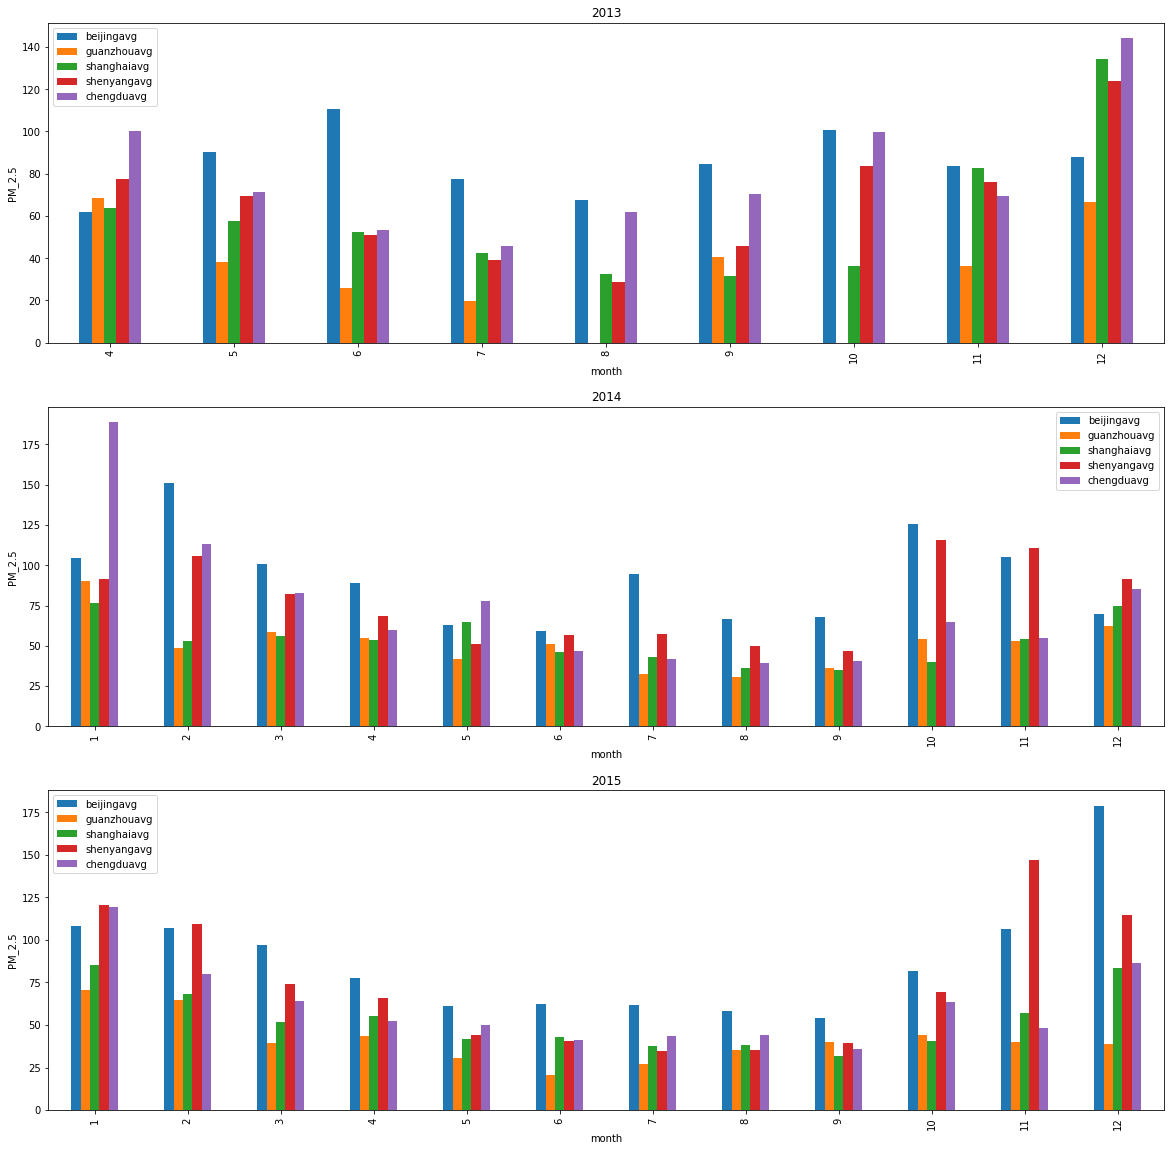

In [153]:
#This plot shows the average pm2.5 concentration measured over a month in different cities of China for different years.
#This shows the pm2.5 is lower during the summer season than winter. My guess will be the rain and wind during summer
#might absorbs the particle responsible for pollution. And, the warm air rising might also circulate the air frequently.
#And in most of asian countries people burn woods, fossil fuels to warm the house, these will increase the pollutants.
#Beijing and Chengdu has the highest pm2.5 concentration compare to other cities.
fig, axes = plt.subplots(3,1, figsize=(20,20))
for (year, group), ax in zip(avgplot.groupby('year'), axes.flatten()):
    group.plot(x='month', y=['beijingavg', "guanzhouavg",'shanghaiavg','shenyangavg','chengduavg'], 
               kind='bar', ax=ax, title=year,ylabel='PM_2.5')